# **Medical Insurance Cost Prediction**

**Dataset:-** https://www.kaggle.com/datasets/mirichoi0218/insurance

**Content**

**-> Columns**

1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance

In [1]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,ElasticNetCV,RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import pickle

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
# Load the Dataset
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **Separate Categorical and Numerical Features**

#### **1. Categorical**

In [7]:
cat_col = [col for col in df.columns if df[col].dtype == "O"]
cat_col

['sex', 'smoker', 'region']

In [8]:
df[cat_col].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [9]:
Categorical = df[cat_col]
Categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


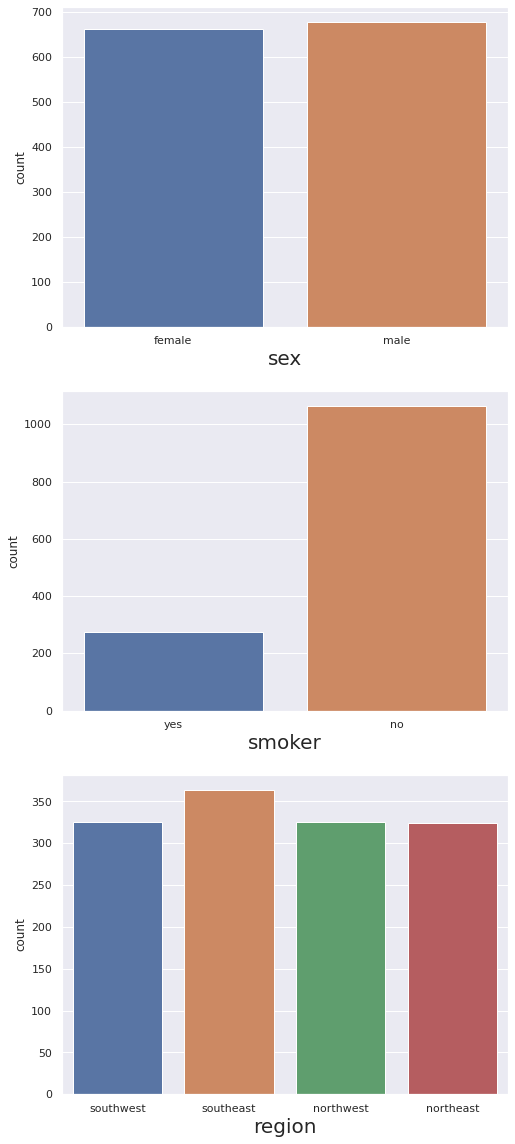

In [10]:
plt.figure(figsize=(8,20))
plotnumber = 1

for column in Categorical:
  if plotnumber <= 4:
    ax = plt.subplot(3,1,plotnumber)
    sns.countplot(Categorical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

**Encoding the categorical features**

In [11]:
Categorical.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [12]:
#Encoding the "Sex" column

Categorical.replace({"sex":{"male":0,"female":1}},inplace = True)

In [13]:
# Encoding the "Smoker" column

Categorical.replace({"smoker":{"yes":0,"no":1}},inplace = True)

In [14]:
Categorical["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
# Encoding "region" Column

Categorical.replace({"region":{"southeast":0,"southwest":1,"northwest":2,"northeast":3}},inplace=True)

In [16]:
Categorical.head()

,sex,smoker,region
0,1,0,1
1,0,1,0
2,0,1,0
3,0,1,2
4,0,1,2


#### **2. Numerical**

In [17]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['age', 'bmi', 'children', 'charges']

In [18]:
df[Num_col].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [19]:
df[Num_col].shape

(1338, 4)

In [20]:
Numerical = df[Num_col]
Numerical.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


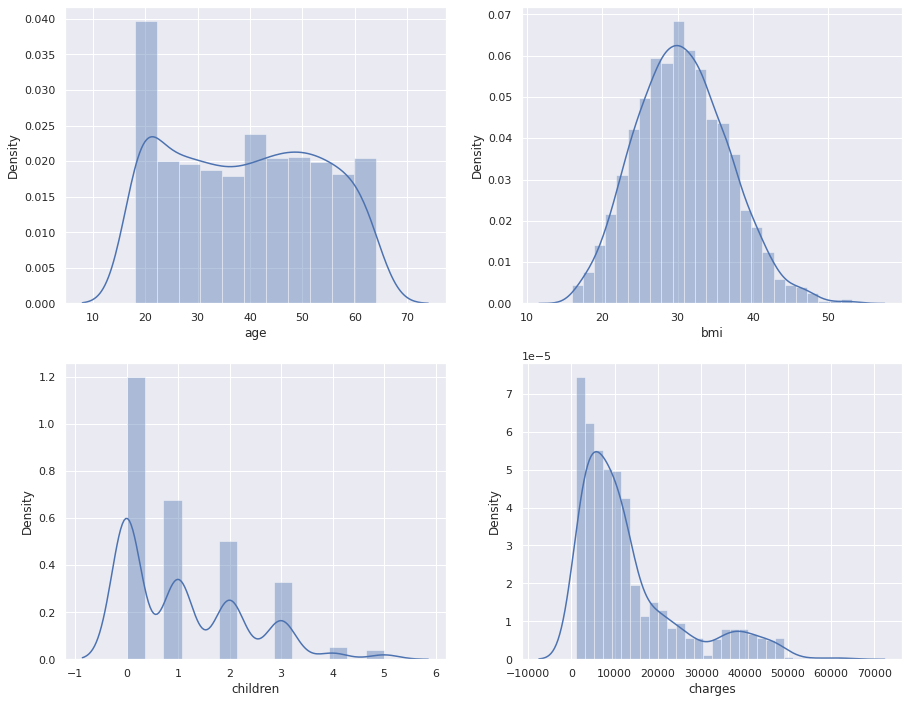

In [21]:
plt.figure(figsize=(15,12))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 5:
    ax = plt.subplot(2,2,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

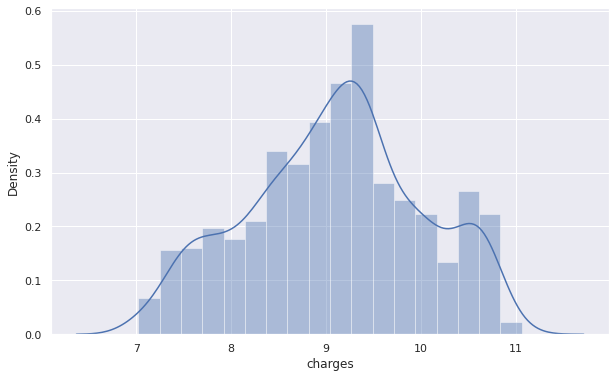

In [22]:
# charges is in right right skewed -> convert it into Normal Distibution uisng (Log Normal Distribution)

plt.figure(figsize=(10,6))
Numerical['charges'] = np.log(Numerical['charges'])
sns.distplot(Numerical["charges"])

### **Concatenate Categorical and Numerical**

In [23]:
data = pd.concat([Categorical,Numerical],axis=1)
data.head()

,sex,smoker,region,age,bmi,children,charges
0,1,0,1,19,27.900,0,9.734176
1,0,1,0,18,33.770,1,7.453302
2,0,1,0,28,33.000,3,8.400538
3,0,1,2,33,22.705,0,9.998092
4,0,1,2,32,28.880,0,8.260197


In [24]:
data.shape

(1338, 7)

In [25]:
data.describe()

,sex,smoker,region,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.494768,0.795217,1.455157,39.207025,30.663397,1.094918,9.098659
std,0.500160,0.403694,1.130197,14.049960,6.098187,1.205493,0.919527
min,0.000000,0.000000,0.000000,18.000000,15.960000,0.000000,7.022756
25%,0.000000,1.000000,0.000000,27.000000,26.296250,0.000000,8.463853
50%,0.000000,1.000000,1.000000,39.000000,30.400000,1.000000,9.146552
75%,1.000000,1.000000,2.000000,51.000000,34.693750,2.000000,9.719558
max,1.000000,1.000000,3.000000,64.000000,53.130000,5.000000,11.063045


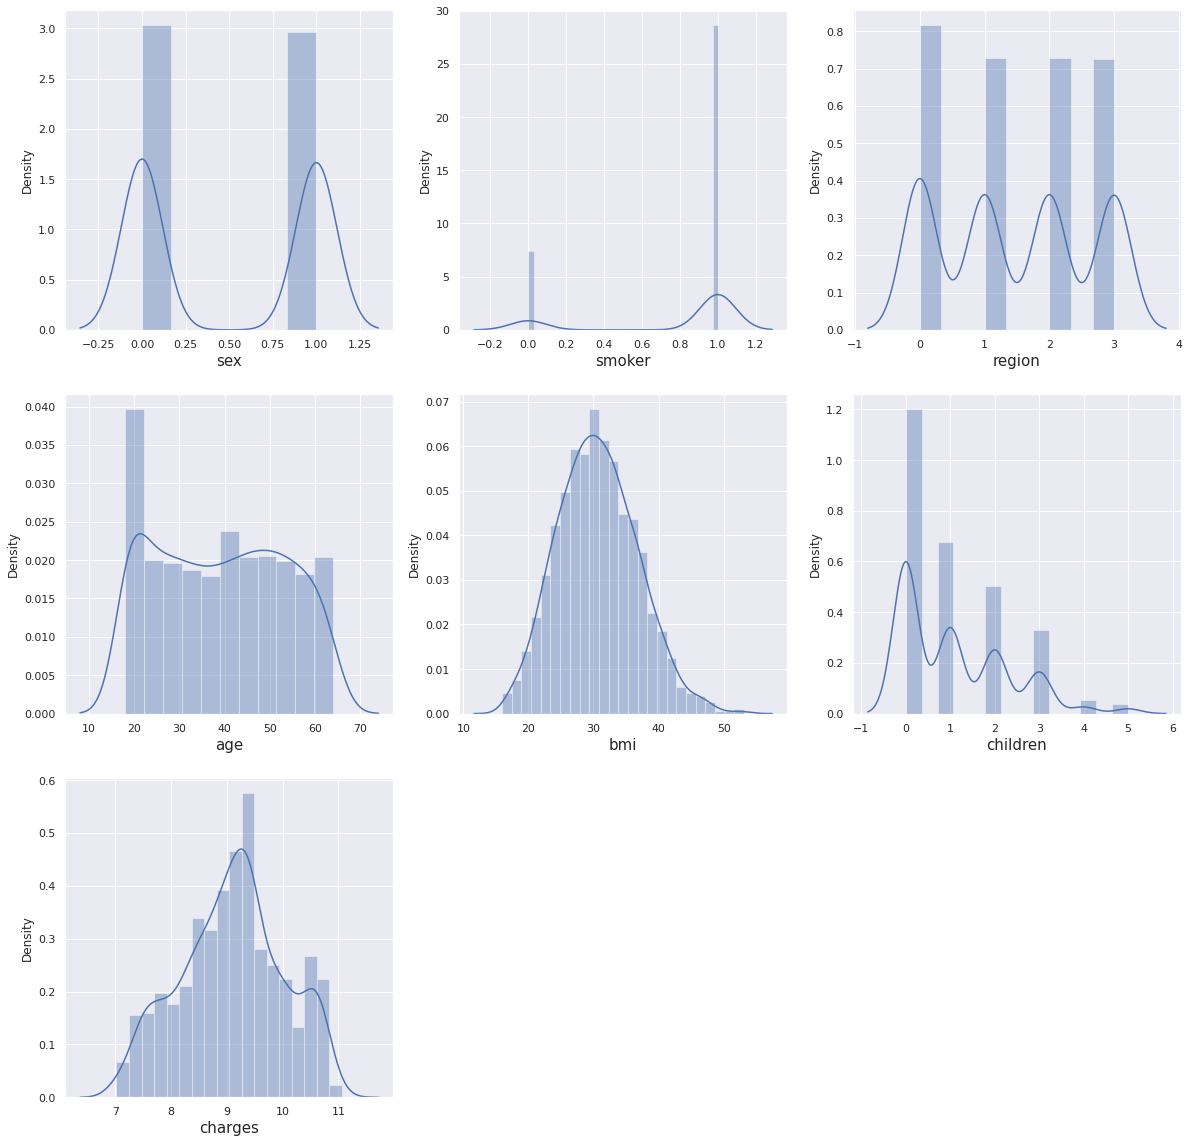

In [26]:
plt.figure(figsize=(20,20))
plotnumber =1

for column in data:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize = 15)
  plotnumber+=1
plt.show()

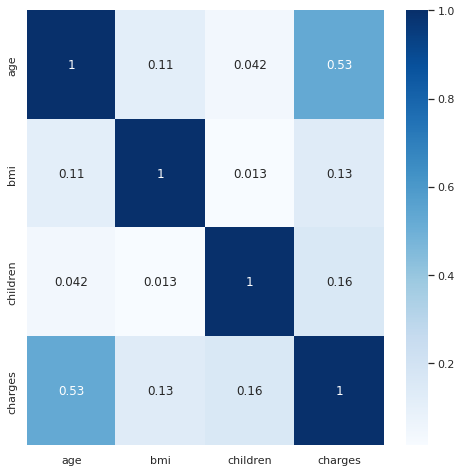

In [27]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

**Splitting the Features and Target**

In [28]:
X = data.drop(columns = ["charges"],axis=1)
y = data["charges"]

In [29]:
X.head()

,sex,smoker,region,age,bmi,children
0,1,0,1,19,27.900,0
1,0,1,0,18,33.770,1
2,0,1,0,28,33.000,3
3,0,1,2,33,22.705,0
4,0,1,2,32,28.880,0


In [30]:
y.head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

**Feature Scaling**

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_scaled

array([[ 1.0105187 , -1.97058663, -0.40287427, -1.43876426, -0.45332   ,
        -0.90861367],
       [-0.98959079,  0.5074631 , -1.28800691, -1.50996545,  0.5096211 ,
        -0.07876719],
       [-0.98959079,  0.5074631 , -1.28800691, -0.79795355,  0.38330685,
         1.58092576],
       ...,
       [ 1.0105187 ,  0.5074631 , -1.28800691, -1.50996545,  1.0148781 ,
        -0.90861367],
       [ 1.0105187 ,  0.5074631 , -0.40287427, -1.29636188, -0.79781341,
        -0.90861367],
       [ 1.0105187 , -1.97058663,  0.48225837,  1.55168573, -0.26138796,
        -0.90861367]])

**Variance Inflation Factor**

In [33]:
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [34]:
vif

,VIF,Features
0,1.008888,sex
1,1.007953,smoker
2,1.077204,region
3,1.016405,age
4,1.091118,bmi
5,1.002254,children


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

**Splitting the data for training and Testing**

In [35]:
# split the dataset into training and Testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [36]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1070, 6)
Shape of X Test:  (268, 6)
Shape of y Train:  (1070,)
Shape of y Test:  (268,)


In [37]:
#from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    #print('predictions are: \n {}'.format(y_prediction))
    #print('\n')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

Score : 0.7633057540937404
r2 score: 0.7842456711369099
MAE: 0.2754451281902456
MSE: 0.19045874303907503
RMSE: 0.4364157914639146


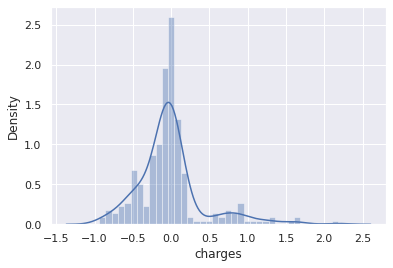

In [38]:
predict(LinearRegression())

Score : 0.9707152796528487
r2 score: 0.8443218618583593
MAE: 0.17908320865804533
MSE: 0.13742603759267033
RMSE: 0.3707101800499554


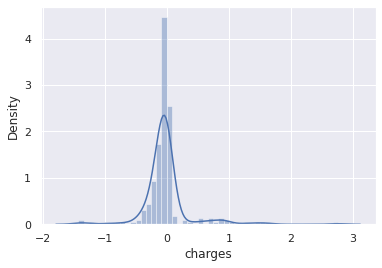

In [39]:
regression = predict(RandomForestRegressor())
regression

Score : 1.0
r2 score: 0.7208011354673097
MAE: 0.21660909502560444
MSE: 0.24646488011175283
RMSE: 0.4964522938931321


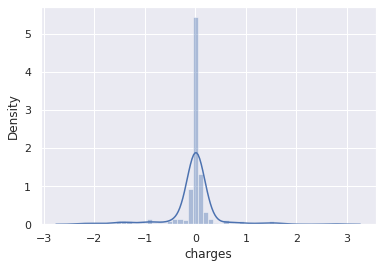

In [40]:
predict(DecisionTreeRegressor())

**Save the Model**

In [41]:
# Save the Model

# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))